In [1]:
import requests

In [2]:
def get_html(url):
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36',
    }
    response = requests.get(url, headers=headers)
    return response

In [3]:
singer_id='6452'
url='https://music.163.com/artist?id='+singer_id
print(url)
singer_html=get_html(url).text

https://music.163.com/artist?id=6452


In [41]:
# singer_html
# 这里看到的和实际网页中的不一样是因为这里部分内容被JS渲染加密了

In [6]:
from lxml import etree

In [7]:
html=etree.HTML(singer_html)

In [8]:
href_xpath = "//*[@id='hotsong-list']//a/@href"
name_xpath = "//*[@id='hotsong-list']//a/text()"
hrefs = html.xpath(href_xpath)
names = html.xpath(name_xpath)

In [9]:
# 设置热门歌曲的ID，歌曲名称
song_ids = []
song_names = []
for id,names in zip(hrefs,names):
    song_ids.append(id[9:])
    song_names.append(names)

In [19]:
print(song_ids[0],song_names[0])

298317 屋顶


In [13]:
import json
import re
headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36'}
res=requests.get('http://music.163.com/api/song/lyric?os=pc&id=' + song_ids[0] + '&lv=-1&kv=-1&tv=-1',headers=headers)
if 'lrc' in res.json():
   lyric = res.json()['lrc']['lyric']
   new_lyric = re.sub(r'[\d:.[\]]','',lyric) #将[04:43.16]中数字信息去掉

In [14]:
new_lyric

' 作词  周杰伦\n 作曲  周杰伦\n 编曲  屠颖\n半夜睡不着觉把心情哼成歌\n只好到屋顶找另一个梦境\n睡梦中被敲醒我还是不确定\n怎会有动人旋律在对面的屋顶\n我悄悄关上门带着希望上去\n原来是我梦里常出现的那个人\n那个人不就是我梦里\n那模糊的人\n我们有同样的默契\n用天线\n用天线排成爱你的形状hoho\n在屋顶唱着你的歌\n在屋顶和我爱的人\n让星星点缀成最浪漫的夜晚\n拥抱这时刻这一分一秒全都停止\n爱开始纠结\n在屋顶唱着你的歌\n在屋顶和我爱的人\n将泛黄的夜献给最孤独的月\n拥抱这时刻这一分一秒全都停止\n爱开始纠结梦有你而美\n半夜睡不着觉把心情哼成歌\n只好到屋顶找另一个梦境\n睡梦中被敲醒我还是不确定\n怎会有动人旋律在对面的屋顶\n我悄悄关上门带着希望上去\n原来是我梦里常出现的那个人\n那个人不就是我梦里\n那模糊的人\n我们有同样的默契\n用天线\n用天线排成爱你的形状hoho\n在屋顶唱着你的歌\n在屋顶和我爱的人\n让星星点缀成最浪漫的夜晚\n拥抱这时刻这一分一秒全都停止\n爱开始纠结\n在屋顶唱着你的歌\n在屋顶和我爱的人\n将泛黄的夜献给最孤独的月\n拥抱这时刻这一分一秒全都停止\n爱开始纠结梦有你而美\n让我爱你是谁\n让你爱我是谁\n怎会有动人旋律环绕在我俩的身边\n让我爱你是谁\n让你爱我是谁\n原来是这屋顶有美丽的邂逅\n在屋顶唱着你的歌\n在屋顶和我爱的人\n'

In [15]:
stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 
              'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and',
              '周杰伦','distributed']
for stop_word in stop_words:
    new_lyric=new_lyric.replace(stop_word,'')
new_lyric

'   \n   \n   屠颖\n半夜睡不着觉把心情哼成歌\n只好到屋顶找另一个梦境\n睡梦中被敲醒我还是不确定\n怎会有动人旋律在对面的屋顶\n我悄悄关上门带着希望上去\n原来是我梦里常出现的那个人\n那个人不就是我梦里\n那模糊的人\n我们有同样的默契\n用天线\n用天线排成爱你的形状hoho\n在屋顶唱着你的歌\n在屋顶和我爱的人\n让星星点缀成最浪漫的夜晚\n拥抱这时刻这一分一秒全都停止\n爱开始纠结\n在屋顶唱着你的歌\n在屋顶和我爱的人\n将泛黄的夜献给最孤独的月\n拥抱这时刻这一分一秒全都停止\n爱开始纠结梦有你而美\n半夜睡不着觉把心情哼成歌\n只好到屋顶找另一个梦境\n睡梦中被敲醒我还是不确定\n怎会有动人旋律在对面的屋顶\n我悄悄关上门带着希望上去\n原来是我梦里常出现的那个人\n那个人不就是我梦里\n那模糊的人\n我们有同样的默契\n用天线\n用天线排成爱你的形状hoho\n在屋顶唱着你的歌\n在屋顶和我爱的人\n让星星点缀成最浪漫的夜晚\n拥抱这时刻这一分一秒全都停止\n爱开始纠结\n在屋顶唱着你的歌\n在屋顶和我爱的人\n将泛黄的夜献给最孤独的月\n拥抱这时刻这一分一秒全都停止\n爱开始纠结梦有你而美\n让我爱你是谁\n让你爱我是谁\n怎会有动人旋律环绕在我俩的身边\n让我爱你是谁\n让你爱我是谁\n原来是这屋顶有美丽的邂逅\n在屋顶唱着你的歌\n在屋顶和我爱的人\n'

In [16]:
import jieba

In [37]:
cut_text=''
for i in song_ids:
    res=requests.get('http://music.163.com/api/song/lyric?os=pc&id=' +i + '&lv=-1&kv=-1&tv=-1',headers=headers)
    if 'lrc' in res.json():
        lyric = res.json()['lrc']['lyric']
        new_lyric = re.sub(r'[\d:.[\]]','',lyric)
        for stop_word in stop_words:
            new_lyric=new_lyric.replace(stop_word,'')
        cut=" ".join(jieba.cut(new_lyric,cut_all=False, HMM=True))
        cut_text+=cut

In [42]:
# cut_text

In [39]:
from wordcloud import WordCloud

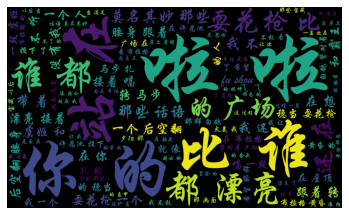

In [40]:
import matplotlib.pyplot as plt
wc = WordCloud(
   font_path="C:\Windows\Fonts\STXINGKA.TTF",
   max_words=100,
   width=2000,
   height=1200,
)
wordcloud = wc.generate(cut_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()